In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob 
from tqdm import tqdm

#sns.set(style="darkgrid")


In [2]:
data = pd.read_csv('dataset/preprocessed.csv')
#pipreqs /path/to/project

In [3]:
data.info() #Fix the size difference: 2 NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
Review      74997 non-null object
Polarity    75000 non-null int64
Useful      75000 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [4]:
data.iloc[33902]

Review      really good service nice place go back childho...
Polarity                                                    0
Useful                                                      1
Name: 33902, dtype: object

In [5]:
data = data[data['Review'].notna()]

In [6]:
#Adding length of clean review 

reviewLen = data.apply(lambda row: len(row.Review), axis = 1)
data['ReviewLength'] = reviewLen

In [7]:
data.head()

,Review,Polarity,Useful,ReviewLength
0,sister really enjoyed cartet april day nice wa...,1,0,486
1,watch pricing wanted buy item attempted charge...,-1,0,223
2,like sampling different teas checking new prod...,1,0,130
3,crispy chicken sandwich good considering going...,1,0,246
4,boyfriend one trip vegas annually pack shows e...,1,0,738


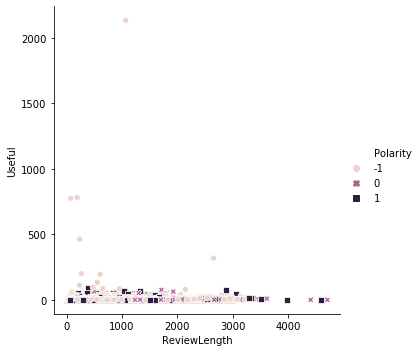

In [8]:
sns.relplot(x="ReviewLength", y="Useful", hue="Polarity", style="Polarity",  data=data)

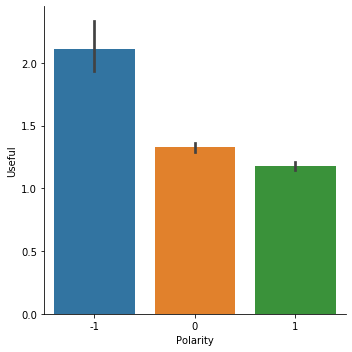

In [9]:
sns.catplot(x="Polarity", y="Useful", kind='bar' ,data=data)

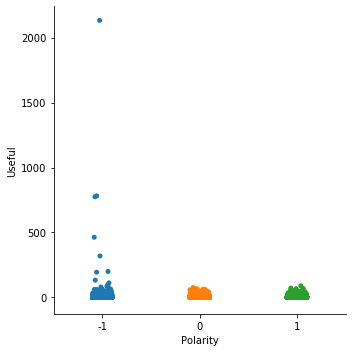

In [10]:
sns.catplot(x="Polarity", y="Useful" ,data=data)

In [11]:
def NumberOfPOSCounter(x):
    posCounters = [0] * 3
    tagPairs = TextBlob(x)
    #print(tagPairs.tags)
    for pairHere in (tagPairs.tags):
        tag = pairHere[1]
        if tag.startswith("NN"):
            posCounters[0] += 1
        elif tag.startswith("JJ"):
            posCounters[1] += 1
        elif tag.startswith("VB"):
            posCounters[2] += 1
    #print(posCounters) 
    return posCounters



In [12]:
i = 0
for idx, row in tqdm(data.iterrows()):
    #print(row['Review'])
    posCounters = NumberOfPOSCounter(row['Review'])
    data.at[idx, 'Nouns'] = posCounters[0]
    data.at[idx, 'Adjectives'] = posCounters[1]
    data.at[idx, 'Verbs'] = posCounters[2]

74997it [05:25, 230.36it/s]


In [13]:
data.isna().any()

Review          False
Polarity        False
Useful          False
ReviewLength    False
Nouns           False
Adjectives      False
Verbs           False
dtype: bool

In [14]:
data.head()

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
0,sister really enjoyed cartet april day nice wa...,1,0,486,35.0,15.0,14.0
1,watch pricing wanted buy item attempted charge...,-1,0,223,21.0,6.0,7.0
2,like sampling different teas checking new prod...,1,0,130,7.0,4.0,4.0
3,crispy chicken sandwich good considering going...,1,0,246,12.0,6.0,11.0
4,boyfriend one trip vegas annually pack shows e...,1,0,738,46.0,23.0,23.0


In [ ]:
data.to_csv('dataset/data_with_tags.csv', index=False)